# Clasificación K-nearest neighbors y GridSearch (parameter tuning)

Objetivo: Comprender otro tipo de clasificación básica y el ajuste de hiperparámetros.

- Documentación KNN : https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-nearest-neighbors

- Documentación GridSearch: https://scikit-learn.org/stable/modules/grid_search.html

En la clasificación k-NN, se asigna el elemento a clasificar a la clase donde la mayoría de sus elementos de entrenamiento (vecinos) pertenecen. Si k = 1, entonces el objeto simplemente se asigna a la clase de ese vecino más cercano, si k = 3, se asigna a la clase donde la mayoría de los tres elementos pertenecen. Este tipo de clasificación es muy común y cuenta con muchas variantes.

- Para ajustar el parámetro $k$ con el menor error, así como otros parámetros (parameter tuning), se utiliza GridSearch de sklearn 

In [1]:
import sklearn 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Análisis exploratorio
### Etiquetas de clase a valor numérico

- Diagnosis (M = malignant, B = benign) 

In [2]:
%matplotlib inline
df = pd.read_csv("data-breast.csv",index_col=0)
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


## Análisis Exploratorio 
- Verificar valores nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

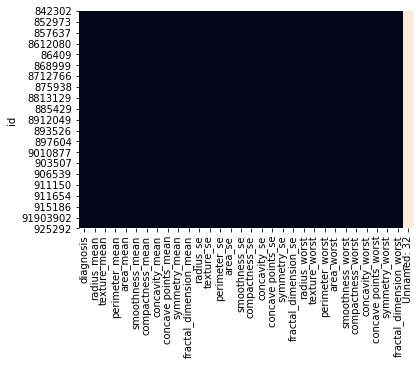

In [4]:
sns.heatmap(df.isnull(), cbar=False)

- Etiquetas a valor numérico

In [5]:
df = df.replace({'B':0, 'M':1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- Equilibrio de etiquetas

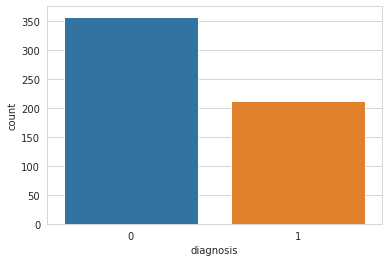

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

- Distribución de variable

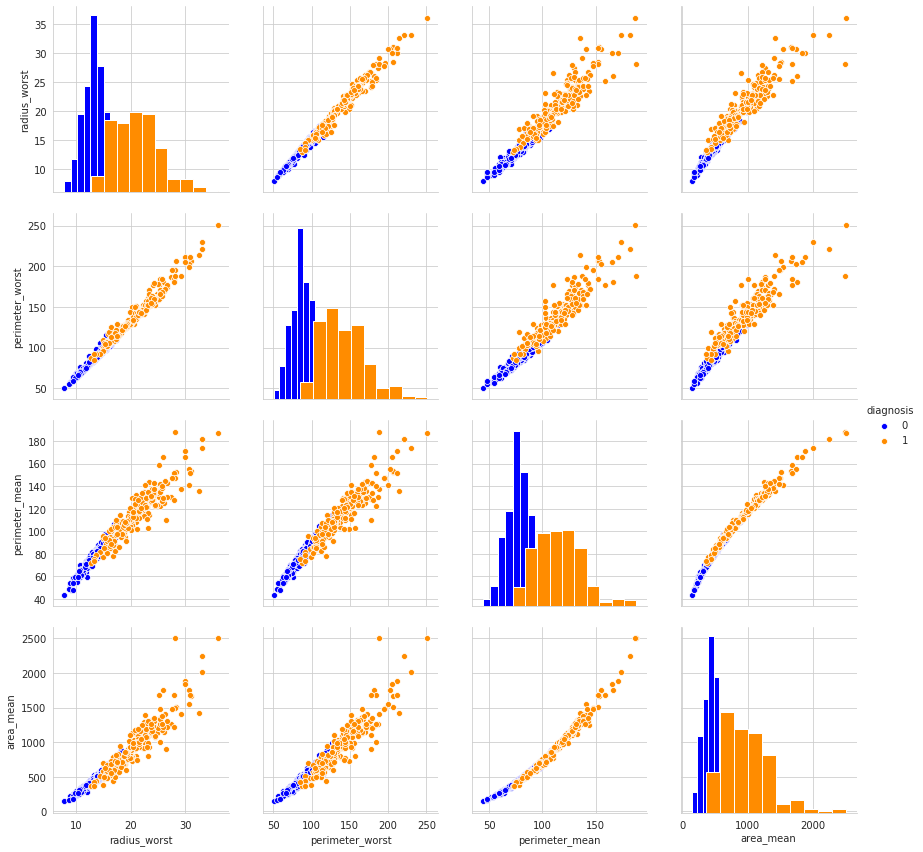

In [7]:
sns.pairplot(df, vars=["radius_worst", "perimeter_worst", "perimeter_mean", "area_mean"],
             palette=sns.color_palette(['blue', 'darkorange']), hue='diagnosis', diag_kind="hist", height=3)
plt.show()

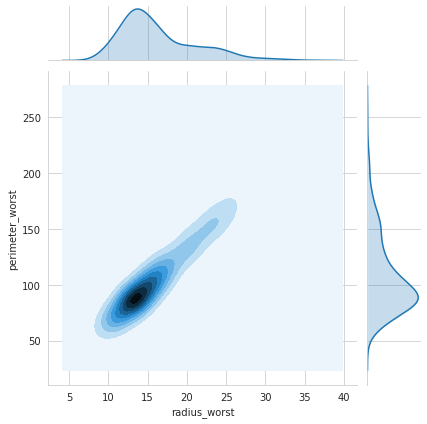

In [8]:
sns.jointplot("radius_worst", "perimeter_worst", data=df, kind='kde')

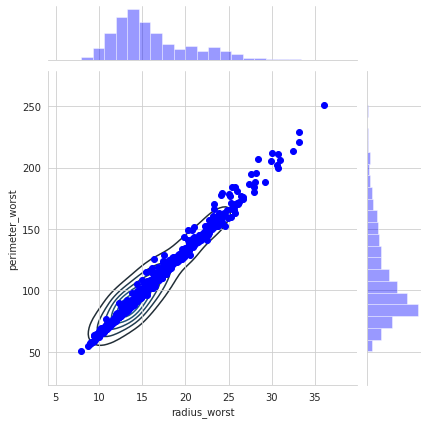

In [9]:
sns.jointplot("radius_worst", "perimeter_worst", data=df, color="b").plot_joint(sns.kdeplot, zorder=0, n_levels=6)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier()

In [11]:
from sklearn.model_selection import train_test_split 
  
X = df.drop('diagnosis',axis=1)
X = X.drop('Unnamed: 32',axis=1)
y = df['diagnosis']
# dividir datos 
train, test, train_labels, test_labels = train_test_split(X, y, 
                                       test_size = 0.3, random_state = 22) 

## Ajuste de parámetros de KNN con GridSearchCV
- GridSearchCV realiza una búsqueda por fuerza bruta sobre todos los posibles parámetros 
- A diferencia del ejemplo de NaiveBayes, con grid search no se requiere 'for loop' para cada parámetro

In [12]:
acc = [] #guarda accuracy
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(train, train_labels)
    pred = knn.predict(test)
    acc.append(accuracy_score(test_labels, pred))

Text(0, 0.5, 'Accuracy')

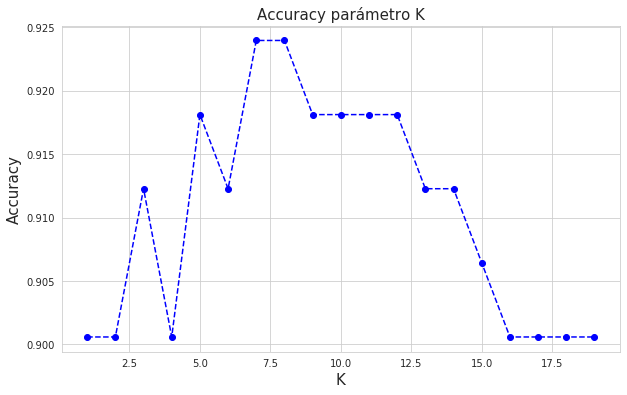

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color='blue', linestyle='--', marker='o')
plt.title('Accuracy parámetro K', fontsize=15)
plt.xlabel('K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)

- El ciclo indica que k=8 es el mejor parámetro con 'manhattan'

In [14]:
acc[7]

0.9239766081871345

- Para evaluar los demás parámetros se importa GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

## Se evalúan tres parámetros con GridSearchCV
- Además del parámetro 'k' se toma en cuenta 'weights' y 'metric'

In [16]:
train, test, train_labels, test_labels = train_test_split(X, y, 
                                       test_size = 0.15, random_state = 22) 

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
k_vecinos = list(range(1,20))
weight_options = ["uniform", "distance"]
metric_options = ["manhattan", 'minkowski']

param_grid = dict(n_neighbors = k_vecinos, weights = weight_options, 
                  metric = metric_options)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, scoring = 'accuracy',cv = 10)
grid.fit(train,train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

## Los mejores parámetros

In [19]:
grid.best_score_

0.94824016563147

In [20]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [21]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

## Evaluación de modelo
- Se obtienen las predicciones, informe de clasificación y matriz de confusión.
- Se crea modelo con los mejores parámetros
- Se obtienen las predicciones, informe de clasificación y matriz de confusión.

In [22]:
predictions = grid.predict(test)

In [23]:
grid.score(test, test_labels)

0.9418604651162791

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print("Predicciones:\n")
print(predictions) 
print("\nReporte de clasificación:\n")
print(classification_report(predictions,test_labels))

Predicciones:

[0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 1 0 0 1]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.94      0.91      0.92        33

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86



In [25]:
print("Confusion matrix")
conf_mat=confusion_matrix(predictions,test_labels)
print(conf_mat)

Confusion matrix
[[51  2]
 [ 3 30]]


- Ajustando los parámetros se obtiene un modelo mas potente
- Probar los clasificadores aprendidos con un diferente dataset
- Experimentar con parámetros y GridSearch